In [1]:
import anndata as ad  
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import numpy as np
import pandas as pd
import pcdl
import os

In [7]:
from collect_data import collect
data = pd.DataFrame()
for i in range(2):
    res = collect('../output/','./config/NLC_CLL.xml')
    data = pd.concat([res, data], axis=1)

reading: ../output/NLC_CLL.xml
Warning @ pyMCDS._read_xml : cell_definition custom_data without variable type setting detected. ['sample']
reading: ../output/output00000000.xml
working on metadata ...
working on mesh data ...
reading: ../output/initial_mesh0.mat
working on microenvironment data ...
reading: ../output/output00000000_microenvironment0.mat
parsing: anti-apoptotic_factor data
parsing: debris data
working on discrete cell data ...
reading: ../output/output00000000_cells.mat
working on graph data ...
reading: ../output/output00000000_cell_neighbor_graph.txt
reading: ../output/output00000000_attached_cells_graph.txt
done!

reading: ../output/NLC_CLL.xml
Warning @ pyMCDS._read_xml : cell_definition custom_data without variable type setting detected. ['sample']
reading: ../output/output00000001.xml
working on metadata ...
working on mesh data ...
reading: ../output/initial_mesh0.mat
working on microenvironment data ...
reading: ../output/output00000001_microenvironment0.mat
par

/home/marcelo.hurtado/anaconda3/lib/python3.11/site-packages/pcdl/pyMCDS.py:1216: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_cell.loc[:,'current_death_model'].replace(ds_death_model, inplace=True)  # bue 20230614: this column looks like an artefact to me
/home/marcelo.hurtado/anaconda3/lib/python3.11/site-packages/pcdl/pyMCDS.py:1217: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method

reading: ../output/NLC_CLL.xml
Warning @ pyMCDS._read_xml : cell_definition custom_data without variable type setting detected. ['sample']
reading: ../output/output00000000.xml
working on metadata ...
working on mesh data ...
reading: ../output/initial_mesh0.mat
working on microenvironment data ...
reading: ../output/output00000000_microenvironment0.mat
parsing: anti-apoptotic_factor data
parsing: debris data
working on discrete cell data ...
reading: ../output/output00000000_cells.mat
working on graph data ...
reading: ../output/output00000000_cell_neighbor_graph.txt
reading: ../output/output00000000_attached_cells_graph.txt
done!

reading: ../output/NLC_CLL.xml
Warning @ pyMCDS._read_xml : cell_definition custom_data without variable type setting detected. ['sample']
reading: ../output/output00000001.xml
working on metadata ...
working on mesh data ...
reading: ../output/initial_mesh0.mat
working on microenvironment data ...
reading: ../output/output00000001_microenvironment0.mat
par

/home/marcelo.hurtado/anaconda3/lib/python3.11/site-packages/pcdl/pyMCDS.py:1216: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_cell.loc[:,'current_death_model'].replace(ds_death_model, inplace=True)  # bue 20230614: this column looks like an artefact to me
/home/marcelo.hurtado/anaconda3/lib/python3.11/site-packages/pcdl/pyMCDS.py:1217: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method

In [8]:
from merge_data import merge
viability, concentration = merge(data)

In [43]:
import multiprocessing
import pandas as pd

# Toy model_simulation function
def model_simulation(config_file, replicates, param1, param2):
    # This is just a placeholder function, replace it with your actual simulation function
    result1 = pd.DataFrame({'Output1': [param2 * i for i in range(1, 14)]})  # Example output 1
    result2 = pd.DataFrame({'Output2': [param1 * i for i in range(1, 14)]})  # Example output 2
    return result1, result2

# Example input dictionary
input_data = {
    'param1': 1,
    'param2': 2
}

# Example default_values list
default_values = [1, 2]

# Example multiprocessing pool
pool = multiprocessing.Pool()

# Example reset_values function
def reset_values(data, values_def):        
    for i, key in enumerate(data.keys()):
        data[key] = values_def[i]

# Example vals list
vals = [10, 20, 30, 40]

for parameter in input_data.keys():
    x = []
    for i in vals:
        input_data[parameter] = i
        x.append(tuple(input_data.values()))
        reset_values(input_data, default_values)

    params = [(("./config/NLC_CLL.xml", 2) + x[contador]) for contador in range(len(vals))]

    results = pool.starmap(model_simulation, params)

pool.close()
pool.join()

#print(x)
#print(results[1][0])

viability = results[0][0]
concentration = results[0][1]

for i in range(1, len(vals)):
    via, conc = results[i]
#    print(via)
    viability = pd.concat([viability, via], axis=1, ignore_index=True)
    concentration = pd.concat([concentration, conc], axis=1, ignore_index=True)

#test = pd.concat([via, viability], axis=1)


In [48]:
print("viability: " + str(x[0]))

viability: (1, 10)


In [44]:
import pickle
with open('../my_list.pkl', 'rb') as f:
    data = pickle.load(f)

#print(data[0])

vals = [10]
#print(len(vals))

viability = data[0][0]
concentration = data[0][1]

for i in range(1, len(vals)):
    via, conc = data[i]
    viability = pd.concat([via, viability], axis=1)
    concentration = pd.concat([conc, concentration], axis=1)

In [37]:
num_tasks = 2

input = {'uptake_rate_cancer': 1.0, 'speed_cancer': 1.0, 'transformation_rate_cancer': 5e-5,
                  'speed_monocytes':1.0, 'dead_phagocytosis_rate_monocytes':25e-2, 'speed_macrophages':1.0,
                  'dead_phagocytosis_rate_macrophages':92e-2, 'secretion_rate_NLCs':1.0, 'speed_NLCs':1.0,
                  'dead_phagocytosis_rate_NLCs':4e-2}

default_values = list(input.values())

#death rate apoptotic cells
#number of initial apoptotic cells 
#number of initial CLL cells

vals = [10, 40, 60, 80, 100, 130]
#vals = [10]

def reset_values(data, values_def):        
    for i, key in enumerate(data.keys()):
        data[key] = values_def[i]

for parameter in input.keys():
    x = []
    for i in vals:
        input[parameter] = i
        x.append(tuple(input.values()))
        reset_values(input, default_values)

    thread_params = []

    if num_tasks >= len(vals):
        for thread_id, param in zip(range(num_tasks), x):
            thread_params.append((thread_id,) + param)
    else:
        for i, param in enumerate(x):
            thread_id = i % num_tasks + 1
            thread_params.append((thread_id,) + param)


#print(thread_params)
#print(len(input))
print(x[0])


(1.0, 1.0, 5e-05, 1.0, 0.25, 1.0, 0.92, 1.0, 1.0, 10)


In [55]:
import xml.etree.ElementTree as ET
input_file_path = "../config/NLC_CLL.xml"

tree = ET.parse(input_file_path) #Load xml file
root = tree.getroot()
thread = 3
output_folder = "output_" + str(thread)
param_element = root.find(".//save/folder") #Find the random seed in XML file
param_element.text = str(output_folder)
print(param_element.text)
updated_xml_str = ET.tostring(root, encoding="unicode", method="xml")
stdin_str = updated_xml_str

print(stdin_str)

output_3
<PhysiCell_settings version="devel-version">

    <domain>
        <x_min>-900</x_min>
        <x_max>900</x_max>
        <y_min>-900</y_min>
        <y_max>900</y_max>
        <z_min>-10</z_min>
        <z_max>10</z_max>
        <dx>20</dx>
        <dy>20</dy>
        <dz>20</dz>
        <use_2D>true</use_2D>
    </domain>

    <overall>
        <max_time units="min">18720.0</max_time>
        <time_units>min</time_units>
        <space_units>micron</space_units>
        <dt_diffusion units="min">0.01</dt_diffusion>
        <dt_mechanics units="min">0.1</dt_mechanics>
        <dt_phenotype units="min">6</dt_phenotype>
    </overall>

    <parallel>
        <omp_num_threads>6</omp_num_threads>
    </parallel>

    <save>
        <folder>output_3</folder>
        <full_data>
            <interval units="min">60</interval>
            <enable>true</enable>
        </full_data>
        <SVG>
            <interval units="min">60</interval>
            <enable>true</enable>
       

In [3]:
import xml.etree.ElementTree as ET
import subprocess
import sys
import numpy as np
import os
import random
from multiprocessing import Pool
from pymoo.core.problem import Problem
from multiprocessing.pool import ThreadPool
from collect_data import collect
from merge_data import merge
                  
def model_simulation(input_file_path, replicates, *args):                
    #input_file_path = "../config/NLC_CLL.xml"
    #args = thread_params[0]
    thread = args[0] #Extract in which thread we are
    values = args[1:]

    tree = ET.parse(input_file_path) #Load xml file
    root = tree.getroot()

    output_folder = "output_" + str(thread)
    param_element = root.find(".//save/folder") #Find the random seed in XML file
    param_element.text = str(output_folder)

    os.makedirs(output_folder, exist_ok=True)
    #param_behaviors = {'cancer':{'uptake_rate': 0, 'speed': 1, 'transformation_rate': 2},
    #                'monocytes':{'speed': 3, 'dead_phagocytosis_rate': 4},
    #                'macrophages':{'speed': 5, 'dead_phagocytosis_rate': 6},
    #                'NLCs': {'secretion_rate': 7, 'speed': 8, 'dead_phagocytosis_rate': 9}}

    param_behaviors = {'cancer':{'uptake_rate': 0, 'speed': 1}}
        
    for i, celltype in enumerate(param_behaviors.keys()): #i = number of keys name and celltype = cell type
        for param, column in param_behaviors[celltype].items(): #param = parameter name and column = column number
            if celltype == 'cancer' and param == 'uptake_rate':
                param_value = values[column] #Extract each value [i, col_index]
                param_element = root.find(f".//*[@name='{celltype}']//*[@name='anti-apoptotic factor']//{param}") #Find the param name in XML file
                param_element.text = str(param_value)
            elif celltype == 'cancer' and param == 'transformation_rate':
                param_value = values[column] #Extract each value [i, col_index]
                param_element = root.find(f".//*[@name='{celltype}']//{param}/[@name='apoptotic']") #Find the param name in XML file
                param_element.text = str(param_value)
            elif celltype == 'NLCs' and param == 'secretion_rate':
                param_value = values[column] #Extract each value [i, col_index]
                param_element = root.find(f".//*[@name='{celltype}']//*[@name='anti-apoptotic factor']//{param}") #Find the param name in XML file
                param_element.text = str(param_value)
            else:
                param_value = values[column] #Extract each value [i, col_index]
                param_element = root.find(f".//*[@name='{celltype}']//{param}") #Find the param name in XML file
                param_element.text = str(param_value)

    # Define the command to call your C++ software with the updated XML as input
    command = ["./project", "./config/NLC_CLL.xml"]
    data = pd.DataFrame()        
    param_element = root.find(".//random_seed") #Find the random seed in XML file
    param_element.text = str(random.randint(0,4294967295))

    # Write the updated XML to a string
    for i in range(replicates):
        updated_xml_str = ET.tostring(root, encoding="unicode", method="xml")

    return updated_xml_str

num_tasks = 3
pool = ThreadPool(num_tasks) 
n_replicates = 2

default_values = [1.0, 1.0]

input = {'uptake_rate_cancer': 1.0, 'speed_cancer': 1.0}

vals = [10, 40]

def reset_values(data, values_def):        
    for i, key in enumerate(data.keys()):
        data[key] = values_def[i]

for parameter in input.keys():
    x = []
    for i in vals:
        input[parameter] = i
        x.append(tuple(input.values()))
        reset_values(input, default_values)
    
    thread_params = []
    if num_tasks >= len(vals):
        for thread_id, param in zip(range(num_tasks), x):
            thread_params.append((thread_id,) + param)
    else:
        for i, param in enumerate(x):
            thread_id = i % num_tasks + 1
            thread_params.append((thread_id,) + param)

    params = [(("../config/NLC_CLL.xml", n_replicates) + thread_params[contador]) for contador in range(len(vals))]
    results = pool.starmap(model_simulation, params)


print(results[1])


NameError: name 'pd' is not defined

In [22]:
param_behaviors = {'cancer':{'uptake_rate': 0, 'speed': 1}}
        
for i, celltype in enumerate(param_behaviors.keys()): #i = number of keys name and celltype = cell type
    for param, column in param_behaviors[celltype].items(): #param = parameter name and column = column number
        print(param)
        print(column)
        print(i)
        print(celltype)

args = thread_params[0]
values = args[1:]

print(values[0])
print(values[1])

print(params[0])

uptake_rate
0
0
cancer
speed
1
0
cancer
10
1.0
('../config/NLC_CLL.xml', 2, 0, 10, 1.0)


In [20]:
import xml.etree.ElementTree as ET
import subprocess
import sys
import numpy as np
import pandas as pd
import os
import random
from multiprocessing import Pool
from pymoo.core.problem import Problem
from multiprocessing.pool import ThreadPool
from collect_data import collect
from merge_data import merge

input_file_path = "../config/NLC_CLL.xml"
args = thread_params[0]
thread = args[0] #Extract in which thread we are
values = args[1:]

tree = ET.parse(input_file_path) #Load xml file
root = tree.getroot()

output_folder = "output_" + str(thread)
param_element = root.find(".//save/folder") #Find the random seed in XML file
param_element.text = str(output_folder)

os.makedirs(output_folder, exist_ok=True)
    #param_behaviors = {'cancer':{'uptake_rate': 0, 'speed': 1, 'transformation_rate': 2},
    #                'monocytes':{'speed': 3, 'dead_phagocytosis_rate': 4},
    #                'macrophages':{'speed': 5, 'dead_phagocytosis_rate': 6},
    #                'NLCs': {'secretion_rate': 7, 'speed': 8, 'dead_phagocytosis_rate': 9}}

param_behaviors = {'cancer':{'uptake_rate': 0, 'speed': 1}}
        
for i, celltype in enumerate(param_behaviors.keys()): #i = number of keys name and celltype = cell type
    for param, column in param_behaviors[celltype].items(): #param = parameter name and column = column number
        if celltype == 'cancer' and param == 'uptake_rate':
            param_value = values[column] #Extract each value [i, col_index]
            param_element = root.find(f".//*[@name='{celltype}']//*[@name='anti-apoptotic factor']//{param}") #Find the param name in XML file
            param_element.text = str(param_value)
        elif celltype == 'cancer' and param == 'transformation_rate':
            param_value = values[column] #Extract each value [i, col_index]
            param_element = root.find(f".//*[@name='{celltype}']//{param}/[@name='apoptotic']") #Find the param name in XML file
            param_element.text = str(param_value)
        elif celltype == 'NLCs' and param == 'secretion_rate':
            param_value = values[column] #Extract each value [i, col_index]
            param_element = root.find(f".//*[@name='{celltype}']//*[@name='anti-apoptotic factor']//{param}") #Find the param name in XML file
            param_element.text = str(param_value)
        else:
            param_value = values[column] #Extract each value [i, col_index]
            param_element = root.find(f".//*[@name='{celltype}']//{param}") #Find the param name in XML file
            param_element.text = str(param_value)

# Define the command to call your C++ software with the updated XML as input
command = ["./project", "./config/NLC_CLL.xml"]
data = pd.DataFrame()        
param_element = root.find(".//random_seed") #Find the random seed in XML file
param_element.text = str(random.randint(0,4294967295))

# Write the updated XML to a string
updated_xml_str = ET.tostring(root, encoding="unicode", method="xml")

print(updated_xml_str)

<PhysiCell_settings version="devel-version">

    <domain>
        <x_min>-900</x_min>
        <x_max>900</x_max>
        <y_min>-900</y_min>
        <y_max>900</y_max>
        <z_min>-10</z_min>
        <z_max>10</z_max>
        <dx>20</dx>
        <dy>20</dy>
        <dz>20</dz>
        <use_2D>true</use_2D>
    </domain>

    <overall>
        <max_time units="min">18720.0</max_time>
        <time_units>min</time_units>
        <space_units>micron</space_units>
        <dt_diffusion units="min">0.01</dt_diffusion>
        <dt_mechanics units="min">0.1</dt_mechanics>
        <dt_phenotype units="min">6</dt_phenotype>
    </overall>

    <parallel>
        <omp_num_threads>6</omp_num_threads>
    </parallel>

    <save>
        <folder>output_0</folder>
        <full_data>
            <interval units="min">60</interval>
            <enable>true</enable>
        </full_data>
        <SVG>
            <interval units="min">60</interval>
            <enable>true</enable>
            <plo

In [6]:
input = {'uptake_rate_cancer': 1.0, 'speed_cancer': 1.0, 'transformation_rate_cancer': 5e-5,
                  'speed_monocytes':1.0, 'dead_phagocytosis_rate_monocytes':25e-2, 'speed_macrophages':1.0,
                  'dead_phagocytosis_rate_macrophages':92e-2, 'secretion_rate_NLCs':1.0, 'speed_NLCs':1.0,
                  'dead_phagocytosis_rate_NLCs':4e-2}

vals = list(input.values())
print(vals)

default_values = [1.0, 1.0]

[1.0, 1.0, 5e-05, 1.0, 0.25, 1.0, 0.92, 1.0, 1.0, 0.04]


In [29]:
from sampling import sobol_sampling
samples_sobol_all = sobol_sampling(nsamples=128)

#print(samples_sobol_all.iloc[0])

samples_sobol_all.shape[1]

tuple_of_tuples = tuple(samples_sobol_all.itertuples(index=False, name=None))
print(tuple_of_tuples[0])
len(tuple_of_tuples)

(0.807060593739152, 1.9503240305930376, 4.355534622445703e-05, 1.9631010852754116, 0.37240900564938784, 0.5555431861430407, 0.47517170764505867, 1.1623776964843273, 0.7148407306522131, 0.042576278895139694)


2816

In [55]:
def run_model(config_file, replicates, param1, param2):
    # This is just a placeholder function, replace it with your actual simulation function
    result1 = pd.DataFrame({'Output1': [param2 * i for i in range(1, 14)]})  # Example output 1
    result2 = pd.DataFrame({'Output2': [param1 * i for i in range(1, 14)]})  # Example output 2
    return result1, result2

num_tasks = 14
nsamples = 200
samples_sobol = sobol_sampling(nsamples)
samples_sobol_all = tuple(samples_sobol.itertuples(index=False, name=None))
thread_params = []

#for thread_id, param in zip(range(num_tasks), samples_sobol_all):
#    thread_params.append((thread_id,) + param)

#print(thread_params)

#for param in samples_sobol_all:
#    print(param)

if num_tasks >= len(samples_sobol_all):
    for thread_id, param in zip(range(num_tasks), samples_sobol_all):
        thread_params.append((thread_id,) + param)
else:
    for i, param in enumerate(samples_sobol_all):
        thread_id = i % num_tasks + 1
        thread_params.append((thread_id,) + param)

print(thread_params[0])
print(thread_params[13])
print(thread_params[14])

#print(thread_params.iloc[0])

#params = [(("config/NLC_CLL.xml", n_replicates) + thread_params.iloc[contador]) for contador in range(thread_params.shape[0])]
#results = pool.starmap(run_model, params)

#pool.close()
#pool.join()

for i in range(len(thread_params)):
    print(i)

(1, 1.7096977606415749, 0.23616493865847588, 3.314413269981742e-05, 1.616823012009263, 0.054357127752155066, 1.4741716478019953, 0.12395914174616338, 1.039970699697733, 0.9494766313582659, 0.00648587554693222)
(14, 1.4682042375206947, 1.6693262588232756, 3.314413269981742e-05, 1.7526235319674015, 0.01324065774679184, 0.2490465398877859, 1.7727146504074336, 1.2719187438488007, 0.08947312831878662, 0.0065931232273578645)
(1, 1.4682042375206947, 1.6693262588232756, 8.565362142398954e-05, 1.616823012009263, 0.01324065774679184, 0.2490465398877859, 1.7727146504074336, 1.2719187438488007, 0.08947312831878662, 0.0065931232273578645)
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118


/home/marcelo/mambaforge/lib/python3.10/site-packages/scipy/stats/_qmc.py:804: UserWarning: The balance properties of Sobol' points require n to be a power of 2.
  sample = self._random(n, workers=workers)


In [4]:
import sys
import pandas as pd
from multiprocessing.pool import ThreadPool
from multiprocessing import Pool
from sampling import sobol_sampling
from model_simulation import run_model

nsamples = 2
num_tasks = 2
n_replicates = 2

pool = ThreadPool(num_tasks) 

#Load samples from Sobol
samples_sobol_all = sobol_sampling(nsamples)
samples_sobol_all = tuple(samples_sobol_all.itertuples(index=False, name=None))

thread_params = []

if num_tasks >= len(samples_sobol_all):
    for thread_id, param in zip(range(num_tasks), samples_sobol_all):
        thread_params.append((thread_id,) + param)
else:
    for i, param in enumerate(samples_sobol_all):
        thread_id = i % num_tasks + 1
        thread_params.append((thread_id,) + param)

print(thread_params[0])
print(thread_params[1])
print(thread_params[2])
print(len(thread_params))

(1, 1.3077430352568626, 1.7124946489930153, 9.856280591338874e-05, 0.4941939041018486, 0.12053725682199001, 1.9003442265093327, 0.309582940787077, 0.27244658023118973, 1.9783390313386917, 0.05433065690100193)
(2, 1.3492485545575619, 1.7124946489930153, 9.856280591338874e-05, 0.4941939041018486, 0.12053725682199001, 1.9003442265093327, 0.309582940787077, 0.27244658023118973, 1.9783390313386917, 0.05433065690100193)
(1, 1.3077430352568626, 1.3386435136198997, 9.856280591338874e-05, 0.4941939041018486, 0.12053725682199001, 1.9003442265093327, 0.309582940787077, 0.27244658023118973, 1.9783390313386917, 0.05433065690100193)
44


In [14]:
import pandas as pd
import sys
from multiprocessing.pool import ThreadPool
from multiprocessing import Pool
from model_simulation import run_model

num_tasks = 80
n_replicates = 5

pool = ThreadPool(num_tasks) 

input = {'uptake_rate_cancer': 1.0, 'speed_cancer': 1.0, 'transformation_rate_cancer': 5e-5,
                  'speed_monocytes':1.0, 'dead_phagocytosis_rate_monocytes':25e-2, 'speed_macrophages':1.0,
                  'dead_phagocytosis_rate_macrophages':92e-2, 'secretion_rate_NLCs':1.0, 'speed_NLCs':1.0,
                  'dead_phagocytosis_rate_NLCs':4e-2}

#death rate apoptotic cells
#number of initial apoptotic cells 
#number of initial CLL cells

default_values = list(input.values())

explore_values = [0, 1, 3, 5, 7, 9, 10]

def reset_values(data, values_def):        
    for i, key in enumerate(data.keys()):
        data[key] = values_def[i]

results = []
x = []
thread_params = []
for parameter in input.keys():
    for i in explore_values:
        input[parameter] = i
        x.append(tuple(input.values()))
        reset_values(input, default_values)

for i, param in enumerate(x):
        thread_id = i % num_tasks + 1
        thread_params.append((thread_id,) + param)


len(thread_params)

70

In [ ]:
from collect_data import collect
data = pd.DataFrame()
for i in range(2):
    res = collect('../output/','./config/NLC_CLL.xml')
    data = pd.concat([res, data], axis=1)

In [2]:
mcdsts = pcdl.TimeSeries('../output/', settingxml='../output/NLC_CLL.xml', verbose = False) 
timesteps = mcdsts.get_mcds_list()

#Extract positions corresponding to days 1-13
positions = []
for days in range(0,14):
      hours = 24*days
      positions.append(hours)

#Initial CLL cells
initial = timesteps[0].get_cell_df(states=1)
CLL_initial = len(initial[(initial['cell_type']=="cancer")])
apoptotic_initial = len(initial[(initial['cell_type']=="apoptotic")])

alive = [CLL_initial]
dead = [0]
apoptotic = [apoptotic_initial]
for i in range(1, len(positions)):
    step = timesteps[positions[i]].get_cell_df(states=1)
    number_alive = len(step[(step['cell_type']=='cancer')&(step['dead']==False)])
    number_apoptotic = len(step[(step['cell_type']=='apoptotic')&(step['dead']==False)])
    number_dead = len(step[step['dead']==True])
    alive.append(number_alive)
    dead.append(number_dead)
    apoptotic.append(number_apoptotic)

CLL_alive = pd.Series(alive, name="Cells_alive")
CLL_apoptotic = pd.Series(apoptotic, name = "Cells_apoptotic")
CLL_dead = pd.Series(dead, name = "Cells_dead")

#viability at time t =  CLL alive at time t / (CLL alive + CLL apoptotic + CLL dead) at time t
viability = []
for i in range(len(CLL_alive)):
    number = (CLL_alive[i]/(CLL_alive[i]+CLL_apoptotic[i]+CLL_dead[i]))*100
    viability.append(number)

####Remove day 4, 5, 11, 12 because of experimental
viability = np.delete(viability, [4,5,11,12], axis=0)

viability = pd.Series(viability, name = "CLL viability")

#concentration at time t =  CLL alive at time t / (CLL initial)
concentration = []
for i in range(len(CLL_alive)):
    number = (CLL_alive[i]/CLL_initial)*100
    concentration.append(number)

####Remove day 4, 5, 11, 12 because of experimental
concentration = np.delete(concentration, [4,5,11,12], axis=0)

concentration = pd.Series(concentration, name = "CLL concentration")


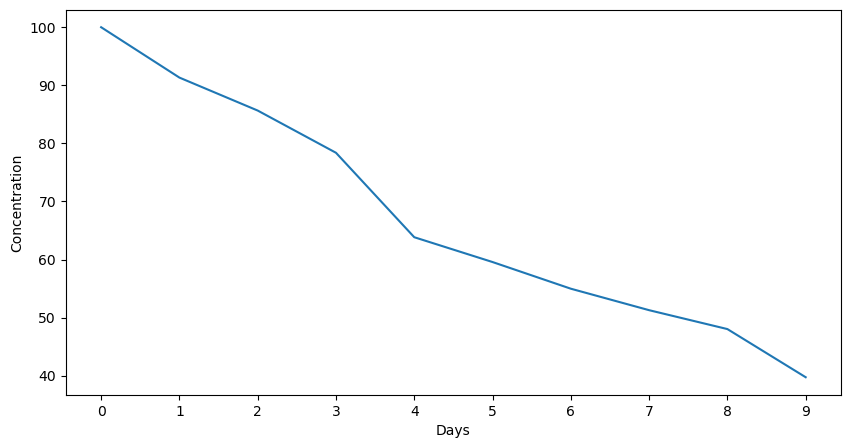

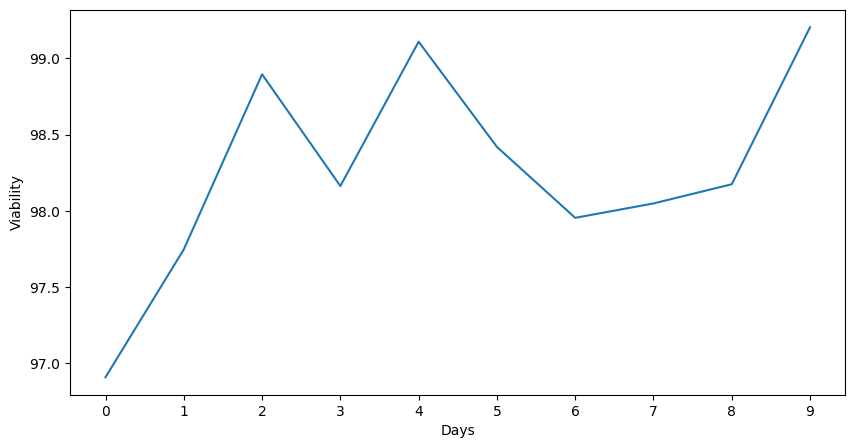

In [3]:
fig, ax = plt.subplots(figsize=(10, 5))
concentration.T.plot(kind='line', xlabel='Days', ylabel='Concentration', logy=False, ax=ax)  
ax.set_xticks(concentration.index)
plt.show()

fig, ax = plt.subplots(figsize=(10, 5))
viability.T.plot(kind='line', xlabel='Days', ylabel='Viability', logy=False, ax=ax)  
ax.set_xticks(viability.index)
plt.show()

In [2]:
import sys
import pandas as pd
from sampling import sobol_sampling

nsamples = 128
num_nodes = 3

#Load samples from Sobol
samples_sobol_all = sobol_sampling(nsamples)

# 12 * 20 = 240 parameters

#Subspaces for running in different nodes
rows = int(len(samples_sobol_all)/num_nodes)

# Loop over the number of output files to generate
for i in range(num_nodes):
    # Calculate the start and end indices for the current output file
    start_idx = i * rows
    end_idx = (i + 1) * rows

    # If this is the last file, include any remaining rows
    if i == num_nodes - 1:
        end_idx = len(samples_sobol_all)

    # Extract the rows for the current output file
    subset = samples_sobol_all[start_idx:end_idx]

    thread_params = pd.DataFrame(subset)
    filename = f'../data_output/Sensitivity_analysis/Samples_{i}.csv'
    thread_params.to_csv(filename, index=False)

In [4]:
len(samples_sobol_all)

1109.3333333333333

In [5]:
from multiprocessing import Pool
from model_simulation import simulate_model
from multiprocessing.pool import ThreadPool
import pandas as pd
import sys

file_params = '../data_output/Sensitivity_analysis/Samples_0.csv'
num_tasks = 32
n_replicates = 5
n_node = 3

pool = ThreadPool(num_tasks) 
results = []

thread_params = pd.read_csv(file_params)
thread_params = [tuple(row) for row in thread_params.itertuples(index=False, name=None)]
params = [(("config/NLC_CLL.xml", n_replicates, n_node, contador+1) + thread_params[contador]) for contador in range(len(thread_params))]


In [7]:
params[0]

('config/NLC_CLL.xml',
 5,
 3,
 1,
 0.8808610793203115,
 0.4756818022578954,
 8.157322267070413e-05,
 0.473784452304244,
 0.4374025268480181,
 0.2977331858128309,
 0.5514605066925288,
 1.8983006123453376,
 0.5266811400651932,
 0.0220732313394546,
 0.0013044562675058,
 1.514780467376113)